In [11]:
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()

In [3]:
X, y = iris.data, iris.target

In [4]:
db = DBSCAN(eps=0.5, min_samples=5).fit(X) #eps how grab increase increases length of arms

In [5]:
core_samples = db.core_sample_indices_
labels = db.labels_

In [6]:
len(core_samples)

117

In [7]:
print "core samples:\n", core_samples #which rows are core samples
print "labels:\n", labels     #produces classes the -1 are out noise 

core samples:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  16  17  19  20
  21  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  58  61
  63  65  66  67  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  88  89  90  91  92  94  95  96  97  99 101 102 103 104
 110 111 112 115 116 120 121 123 124 125 126 127 128 132 133 136 137 138
 139 140 142 143 144 145 146 147 149]
labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [8]:
core_samples2 = np.zeros_like(labels, dtype = bool)
core_samples2[db.core_sample_indices_] = True

In [9]:
df = pd.DataFrame(core_samples2,columns = ['core'])
df['label'] = labels
df

,core,label
0,True,0
1,True,0
2,True,0
3,True,0
4,True,0
5,True,0
6,True,0
7,True,0
8,True,0
9,True,0


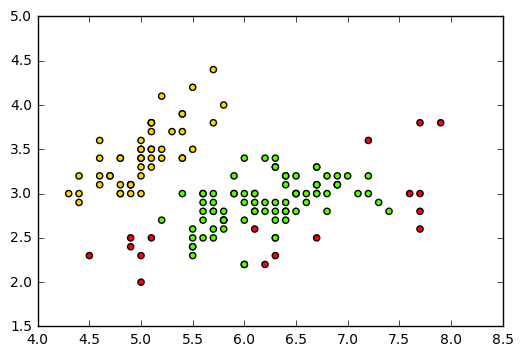

In [12]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='prism')

In [13]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))  #percentage of clusters that are only one type of flower
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))#all labels are grouped together 
## all puple part of the purple class all green part of the green class
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Homogeneity: 0.560
Completeness: 0.657
V-measure: 0.604
Adjusted Rand Index: 0.521
Adjusted Mutual Information: 0.554
Silhouette Coefficient: 0.486


In [14]:
import matplotlib.pyplot as plt


//anaconda/lib/python2.7/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


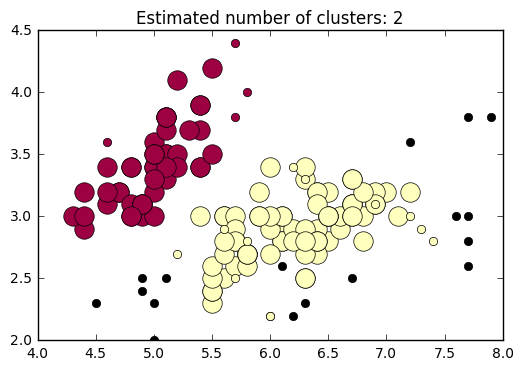

In [15]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
         col = 'k'
     
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples2]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples2]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [16]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=len(X)).fit(X)
distances, indices = nn.kneighbors( X)

In [17]:
pd.DataFrame(indices)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0,17,28,4,39,27,40,7,49,21,...,125,130,107,109,135,131,105,122,117,118
1,1,12,45,9,34,37,25,30,2,35,...,125,130,107,109,135,131,105,122,117,118
2,2,47,3,6,12,45,42,1,29,9,...,125,130,107,109,135,131,105,122,117,118
3,3,47,29,30,2,12,45,8,42,38,...,125,130,107,109,135,131,105,122,117,118
4,4,0,40,17,7,39,27,19,21,28,...,125,130,109,107,135,131,105,122,117,118
5,5,18,10,48,44,46,19,16,21,32,...,102,130,109,107,135,131,105,117,122,118
6,6,47,2,11,29,42,3,7,49,30,...,125,130,109,107,135,131,105,122,117,118
7,7,39,49,0,17,28,4,11,26,27,...,125,130,107,109,135,131,105,122,117,118
8,8,38,3,42,13,47,12,45,2,29,...,125,130,107,109,135,105,131,122,117,118
9,9,37,34,1,30,12,25,49,45,29,...,125,130,107,109,135,131,105,122,117,118


In [18]:
pd.DataFrame(X).iloc[34:38]

,0,1,2,3
34,4.9,3.1,1.5,0.1
35,5.0,3.2,1.2,0.2
36,5.5,3.5,1.3,0.2
37,4.9,3.1,1.5,0.1


In [19]:
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,1.000000e-01,1.414214e-01,0.141421,0.141421,0.141421,0.173205,0.173205,0.223607,0.300000,...,5.312250,5.546170,5.636488,5.639149,5.788782,6.014150,6.095080,6.211280,6.240192,6.498461
1,0.0,1.414214e-01,1.414214e-01,0.173205,0.173205,0.173205,0.223607,0.244949,0.300000,0.300000,...,5.389805,5.591959,5.686827,5.747173,5.860034,6.154673,6.159545,6.261789,6.369458,6.531462
2,0.0,1.414214e-01,2.449490e-01,0.264575,0.264575,0.264575,0.300000,0.300000,0.300000,0.316228,...,5.558777,5.777543,5.866004,5.894065,6.040695,6.312686,6.336403,6.446705,6.520736,6.717887
3,0.0,1.414214e-01,1.732051e-01,0.223607,0.244949,0.264575,0.264575,0.300000,0.300000,0.300000,...,5.438750,5.655086,5.738467,5.784462,5.932116,6.215304,6.215304,6.322974,6.414047,6.590144
4,0.0,1.414214e-01,1.732051e-01,0.173205,0.223607,0.244949,0.244949,0.264575,0.264575,0.282843,...,5.359104,5.601785,5.676266,5.687706,5.843800,6.057227,6.145730,6.265780,6.278535,6.553625
5,0.0,3.316625e-01,3.464102e-01,0.360555,0.374166,0.387298,0.387298,0.400000,0.412311,0.458258,...,4.922398,5.178803,5.205766,5.265928,5.391660,5.559676,5.705261,5.791373,5.836095,6.134330
6,0.0,2.236068e-01,2.645751e-01,0.300000,0.316228,0.316228,0.331662,0.424264,0.424264,0.424264,...,5.496362,5.731492,5.807753,5.813777,5.988322,6.240192,6.280127,6.399219,6.439720,6.670832
7,0.0,1.000000e-01,1.414214e-01,0.173205,0.200000,0.223607,0.223607,0.223607,0.223607,0.223607,...,5.262129,5.492722,5.580323,5.597321,5.746303,5.984981,6.044833,6.158734,6.204031,6.442049
8,0.0,1.414214e-01,3.000000e-01,0.316228,0.346410,0.360555,0.424264,0.424264,0.435890,0.469042,...,5.625833,5.830094,5.914389,5.975784,6.115554,6.395311,6.426508,6.498461,6.617401,6.755738
9,0.0,1.192093e-07,1.192093e-07,0.173205,0.173205,0.173205,0.200000,0.264575,0.264575,0.264575,...,5.332917,5.544367,5.632939,5.697368,5.818075,6.091798,6.108191,6.211280,6.307139,6.487681


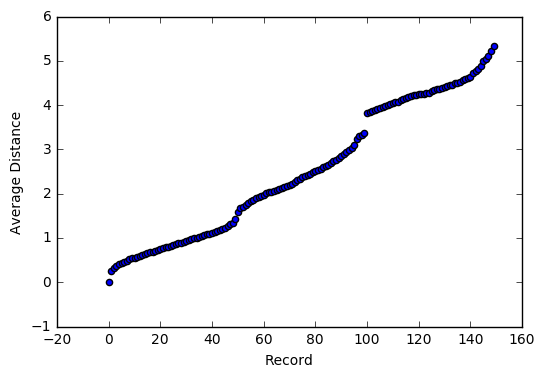

In [23]:
plt.scatter(range(150),pd.DataFrame(distances).mean())
plt.xlabel('Record')
plt.ylabel('Average Distance')
